In [40]:
#import packages
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import shape, Point
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request, json
import requests
import urllib.parse
import datetime
import os

import warnings
warnings.filterwarnings('ignore')


*** StreetCenterLine: https://data.cityofnewyork.us/resource/8rma-cm9c.json

In [56]:
url = 'https://data.cityofnewyork.us/resource/8rma-cm9c.json'

query = (url+'?'
        "$select=*"
        "&$limit=10000000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())

for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
street = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
street = street.drop(columns = ['the_geom'])
street.head()

,physicalid,l_low_hn,l_high_hn,r_low_hn,r_high_hn,l_zip,r_zip,l_blkfc_id,r_blkfc_id,st_label,...,segment_ty,shape_leng,geometry,pre_direct,bike_lane,bike_trafd,post_direc,pre_type,post_modif,pre_modifi
0,3,50,64,51,63,10280,10280,212262587,1222601917,BATTERY PL,...,U,262.77781228,"MULTILINESTRING ((-74.01793 40.70617, -74.0178...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,66,82,65,81,10280,10280,1222600642,1222604562,BATTERY PL,...,U,259.415988519,"MULTILINESTRING ((-74.01757 40.70684, -74.0171...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,84,98,83,101,10280,10280,1222600640,1222600933,BATTERY PL,...,U,280.444780871,"MULTILINESTRING ((-74.01712 40.70746, -74.0166...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,NaN,NaN,NaN,NaN,10280,10280,212262587,1222600931,BATTERY PL,...,U,32.0701391509,"MULTILINESTRING ((-74.01694 40.70481, -74.0170...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,NaN,NaN,NaN,NaN,10004,10004,212262587,212262395,BATTERY PL,...,T,206.27185039,"MULTILINESTRING ((-74.01429 40.70455, -74.0143...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
len(street)

121171

<AxesSubplot:>

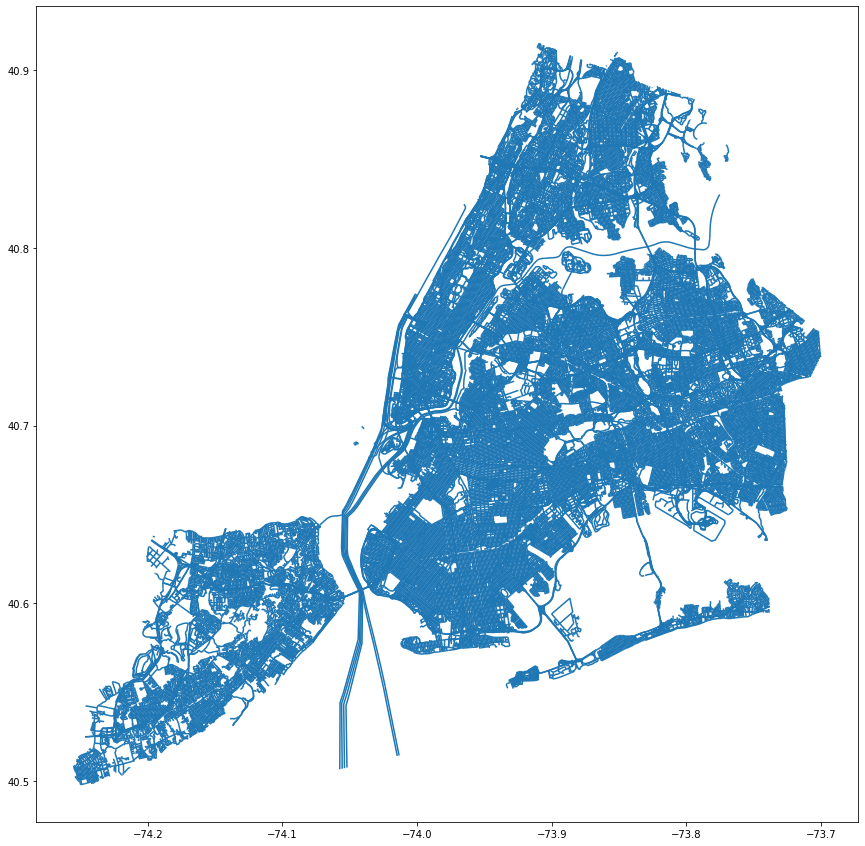

In [58]:
street.plot(figsize = (15,15))

In [59]:
#zips=gpd.read_file('/Users/chz/Desktop/ZIP_CODE_040114/ZIP_CODE_040114.shp')
#
nta=gpd.read_file('/Users/ananyarajesh/Downloads/nynta2020_23a/nynta2020.shp')
nta

,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28914.172236,3.532185e+07,"POLYGON ((1003059.997 204572.025, 1002991.367 ..."
1,3,Brooklyn,047,BK0102,Williamsburg,Wllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28158.316197,2.886214e+07,"POLYGON ((994849.011 203499.267, 994911.093 20..."
2,3,Brooklyn,047,BK0103,South Williamsburg,SWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),18250.280262,1.520896e+07,"POLYGON ((998047.210 196303.325, 998157.901 19..."
3,3,Brooklyn,047,BK0104,East Williamsburg,EWllmsbrg,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),43184.772815,5.226621e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ..."
4,3,Brooklyn,047,BK0201,Brooklyn Heights,BkHts,0,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,14312.504911,9.982322e+06,"POLYGON ((986367.735 190549.239, 985813.835 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...
257,5,Staten Island,085,SI0391,Freshkills Park (South),FrshklPK_S,9,SI03,SI03 South Shore (CD 3 Approximation),33945.420291,4.775877e+07,"POLYGON ((928531.433 150471.714, 929005.649 15..."
258,5,Staten Island,085,SI9561,Fort Wadsworth,FtWdswrth,6,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,14816.104455,9.864874e+06,"POLYGON ((967656.829 155637.132, 967549.629 15..."
259,5,Staten Island,085,SI9591,Hoffman & Swinburne Islands,HffmnIsl,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,4743.128127,6.357020e+05,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
260,5,Staten Island,085,SI9592,Miller Field,MllrFld,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,19197.200973,1.086680e+07,"POLYGON ((960721.609 147492.642, 960370.525 14..."


In [69]:
street.columns

Index(['physicalid', 'l_low_hn', 'l_high_hn', 'r_low_hn', 'r_high_hn', 'l_zip',
       'r_zip', 'l_blkfc_id', 'r_blkfc_id', 'st_label', 'status', 'borocode',
       'st_width', 'created', 'modified', 'trafdir', 'rw_type', 'frm_lvl_co',
       'to_lvl_co', 'snow_pri', 'post_type', 'full_stree', 'st_name',
       'segment_ty', 'shape_leng', 'geometry', 'pre_direct', 'bike_lane',
       'bike_trafd', 'post_direc', 'pre_type', 'post_modif', 'pre_modifi'],
      dtype='object')

In [61]:
nta.columns.values

array(['BoroCode', 'BoroName', 'CountyFIPS', 'NTA2020', 'NTAName',
       'NTAAbbrev', 'NTAType', 'CDTA2020', 'CDTAName', 'Shape_Leng',
       'Shape_Area', 'geometry'], dtype=object)

In [72]:
street.rename(columns={'geometry':'geo'}, )

,physicalid,l_low_hn,l_high_hn,r_low_hn,r_high_hn,l_zip,r_zip,l_blkfc_id,r_blkfc_id,st_label,...,segment_ty,shape_leng,geo,pre_direct,bike_lane,bike_trafd,post_direc,pre_type,post_modif,pre_modifi
0,3,50,64,51,63,10280,10280,212262587,1222601917,BATTERY PL,...,U,262.77781228,"MULTILINESTRING ((979278.645 196555.536, 97929...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,66,82,65,81,10280,10280,1222600642,1222604562,BATTERY PL,...,U,259.415988519,"MULTILINESTRING ((979377.464 196797.796, 97950...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,84,98,83,101,10280,10280,1222600640,1222600933,BATTERY PL,...,U,280.444780871,"MULTILINESTRING ((979503.340 197024.626, 97964...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,NaN,NaN,NaN,NaN,10280,10280,212262587,1222600931,BATTERY PL,...,U,32.0701391509,"MULTILINESTRING ((979553.795 196059.672, 97952...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,NaN,NaN,NaN,NaN,10004,10004,212262587,212262395,BATTERY PL,...,T,206.27185039,"MULTILINESTRING ((980288.141 195963.026, 98026...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121166,199832,NaN,NaN,NaN,NaN,11220,11220,1922602010,22261048,GOWANUS EXPWY EB EN 3 AVE,...,E,18.5428276773,"MULTILINESTRING ((978408.602 172965.650, 97839...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
121167,199841,1800,1828,0,0,10026,10026,1322605685,1322605809,ADAM CLAYTON POWELL JR BLVD,...,R,224.822678278,"MULTILINESTRING ((996619.141 230568.227, 99672...",NaN,2,TF,NaN,NaN,NaN,NaN
121168,199843,0,0,1801,1823,10026,10026,1322605808,1322604018,ADAM CLAYTON POWELL JR BLVD,...,R,224.611094715,"MULTILINESTRING ((996659.033 230546.359, 99676...",NaN,2,FT,NaN,NaN,NaN,NaN
121169,199844,NaN,NaN,NaN,NaN,10026,10026,1322605808,1322604018,ADAM CLAYTON POWELL JR BLVD,...,T,23.8859605587,"MULTILINESTRING ((996647.300 230525.554, 99665...",NaN,2,FT,NaN,NaN,NaN,NaN


In [73]:
street =street.to_crs(2263)

In [74]:
street.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [75]:
nta = nta.to_crs(2263)

In [76]:
nta.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [77]:
street.geometry

0         MULTILINESTRING ((979278.645 196555.536, 97929...
1         MULTILINESTRING ((979377.464 196797.796, 97950...
2         MULTILINESTRING ((979503.340 197024.626, 97964...
3         MULTILINESTRING ((979553.795 196059.672, 97952...
4         MULTILINESTRING ((980288.141 195963.026, 98026...
                                ...                        
121166    MULTILINESTRING ((978408.602 172965.650, 97839...
121167    MULTILINESTRING ((996619.141 230568.227, 99672...
121168    MULTILINESTRING ((996659.033 230546.359, 99676...
121169    MULTILINESTRING ((996647.300 230525.554, 99665...
121170    MULTILINESTRING ((996607.544 230547.314, 99661...
Name: geometry, Length: 121171, dtype: geometry

In [86]:
def get_length(line):
    return line.length

street['length'] = street['geometry'].apply(get_length)

street

,physicalid,l_low_hn,l_high_hn,r_low_hn,r_high_hn,l_zip,r_zip,l_blkfc_id,r_blkfc_id,st_label,...,shape_leng,geometry,pre_direct,bike_lane,bike_trafd,post_direc,pre_type,post_modif,pre_modifi,length
0,3,50,64,51,63,10280,10280,212262587,1222601917,BATTERY PL,...,262.77781228,"MULTILINESTRING ((979278.645 196555.536, 97929...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.777812
1,5,66,82,65,81,10280,10280,1222600642,1222604562,BATTERY PL,...,259.415988519,"MULTILINESTRING ((979377.464 196797.796, 97950...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.415989
2,6,84,98,83,101,10280,10280,1222600640,1222600933,BATTERY PL,...,280.444780871,"MULTILINESTRING ((979503.340 197024.626, 97964...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.444781
3,8,NaN,NaN,NaN,NaN,10280,10280,212262587,1222600931,BATTERY PL,...,32.0701391509,"MULTILINESTRING ((979553.795 196059.672, 97952...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.070139
4,14,NaN,NaN,NaN,NaN,10004,10004,212262587,212262395,BATTERY PL,...,206.27185039,"MULTILINESTRING ((980288.141 195963.026, 98026...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.256653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121166,199832,NaN,NaN,NaN,NaN,11220,11220,1922602010,22261048,GOWANUS EXPWY EB EN 3 AVE,...,18.5428276773,"MULTILINESTRING ((978408.602 172965.650, 97839...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.542828
121167,199841,1800,1828,0,0,10026,10026,1322605685,1322605809,ADAM CLAYTON POWELL JR BLVD,...,224.822678278,"MULTILINESTRING ((996619.141 230568.227, 99672...",NaN,2,TF,NaN,NaN,NaN,NaN,224.822678
121168,199843,0,0,1801,1823,10026,10026,1322605808,1322604018,ADAM CLAYTON POWELL JR BLVD,...,224.611094715,"MULTILINESTRING ((996659.033 230546.359, 99676...",NaN,2,FT,NaN,NaN,NaN,NaN,224.611095
121169,199844,NaN,NaN,NaN,NaN,10026,10026,1322605808,1322604018,ADAM CLAYTON POWELL JR BLVD,...,23.8859605587,"MULTILINESTRING ((996647.300 230525.554, 99665...",NaN,2,FT,NaN,NaN,NaN,NaN,23.885961


In [87]:
totallength = street['length'].sum()

In [90]:
total = totallength/nta.geometry.area

In [91]:
m = gpd.sjoin(street,nta,op='within',how='right')

In [93]:
m['Normalized'] = total

In [94]:
m

,index_left,physicalid,l_low_hn,l_high_hn,r_low_hn,r_high_hn,l_zip,r_zip,l_blkfc_id,r_blkfc_id,...,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape_Leng,Shape_Area,geometry,Normalized
0,118258.0,194041,355,371,0,0,11222,11222,1922613787,102261034,...,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28914.172236,3.532185e+07,"POLYGON ((1003059.997 204572.025, 1002991.367 ...",1.204309
0,59194.0,65991,NaN,NaN,NaN,NaN,11222,11222,1922613787,102263692,...,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28914.172236,3.532185e+07,"POLYGON ((1003059.997 204572.025, 1002991.367 ...",1.204309
0,42074.0,46939,143,195,144,192,11222,11222,1922609241,1922609005,...,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28914.172236,3.532185e+07,"POLYGON ((1003059.997 204572.025, 1002991.367 ...",1.204309
0,39838.0,44551,1067,1089,1068,1090,11222,11222,1922603589,1922613855,...,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28914.172236,3.532185e+07,"POLYGON ((1003059.997 204572.025, 1002991.367 ...",1.204309
0,42077.0,46942,197,251,194,252,11222,11222,1922605769,1922603215,...,BK0101,Greenpoint,Grnpt,0,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),28914.172236,3.532185e+07,"POLYGON ((1003059.997 204572.025, 1002991.367 ...",1.204309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,109543.0,171768,NaN,NaN,NaN,NaN,10306,10306,1722613435,1722609853,...,SI9593,Great Kills Park,GrtKlsPk,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,41465.430028,2.337791e+07,"POLYGON ((952739.319 138974.819, 952732.507 13...",1.819530
261,13715.0,15627,3300,3424,0,0,10306,10306,1722609873,1722600069,...,SI9593,Great Kills Park,GrtKlsPk,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,41465.430028,2.337791e+07,"POLYGON ((952739.319 138974.819, 952732.507 13...",1.819530
261,111490.0,176870,NaN,NaN,NaN,NaN,10306,10306,0,0,...,SI9593,Great Kills Park,GrtKlsPk,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,41465.430028,2.337791e+07,"POLYGON ((952739.319 138974.819, 952732.507 13...",1.819530
261,114668.0,185813,NaN,NaN,NaN,NaN,10306,10306,1722609898,1722613760,...,SI9593,Great Kills Park,GrtKlsPk,9,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,41465.430028,2.337791e+07,"POLYGON ((952739.319 138974.819, 952732.507 13...",1.819530


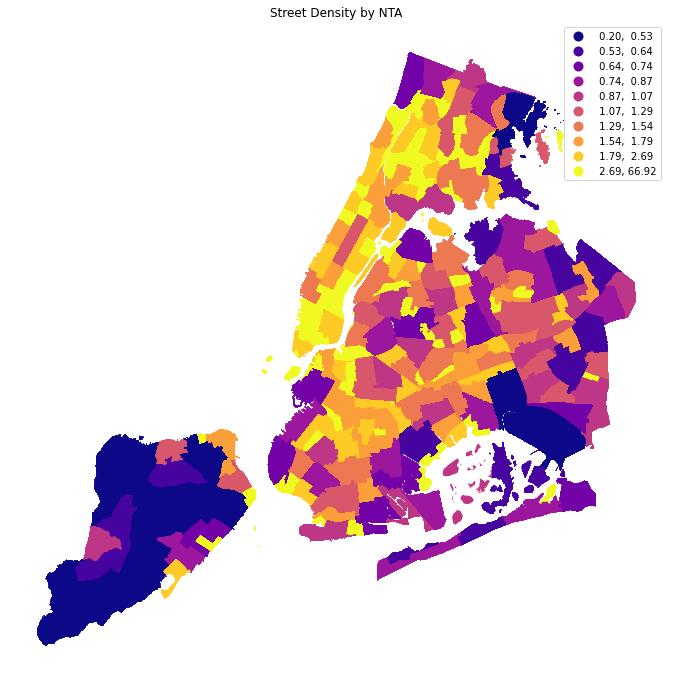

In [103]:
fig, ax = plt.subplots(figsize=(12, 12))
m.plot(ax=ax, scheme='quantiles', cmap='plasma', k=10, column='Normalized', legend=True)
ax.axis('off')
ax.set_title("Street Density by NTA")
plt.show()